<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [127]:
import pandas as pd
from matplotlib import pyplot as plt

**Read bookings data in a datagrame**

In [128]:
df_booking = pd.read_csv('datasets/fact_bookings.csv')
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Explore bookings data**

In [129]:
print(df_booking.shape)
df_booking.columns

(134590, 12)


Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [130]:
df_booking['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [131]:
df_booking['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [132]:
df_booking['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

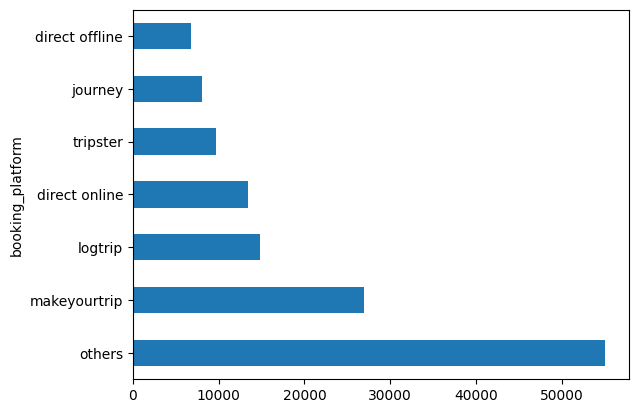

In [133]:
df_booking['booking_platform'].value_counts().plot(kind='barh')

plt.show()

In [134]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Read rest of the files**

In [135]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotel = pd.read_csv('datasets/dim_hotels.csv')
df_room = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [136]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [137]:
print(df_date.shape)
df_date.columns

(92, 4)


Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')

In [138]:
df_date['day_type'].unique()

array(['weekend', 'weekeday'], dtype=object)

In [139]:
df_date['day_type'].value_counts()

day_type
weekeday    65
weekend     27
Name: count, dtype: int64

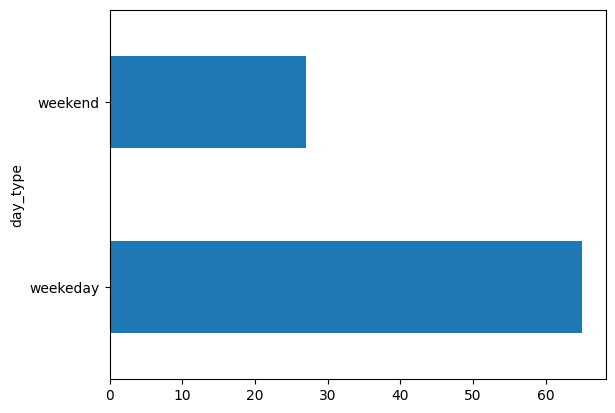

In [140]:
df_date['day_type'].value_counts().plot(kind='barh')

plt.show()

In [141]:
df_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [142]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [143]:
print(df_hotel.shape)
df_hotel.columns

(25, 4)


Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [144]:
print(df_hotel['property_name'].unique(),'\n')
print(df_hotel['category'].unique(),'\n')
print(df_hotel['city'].unique())

['Atliq Grands' 'Atliq Exotica' 'Atliq City' 'Atliq Blu' 'Atliq Bay'
 'Atliq Palace' 'Atliq Seasons'] 

['Luxury' 'Business'] 

['Delhi' 'Mumbai' 'Hyderabad' 'Bangalore']


In [145]:
df_hotel['property_name'].value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

In [146]:
df_hotel['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

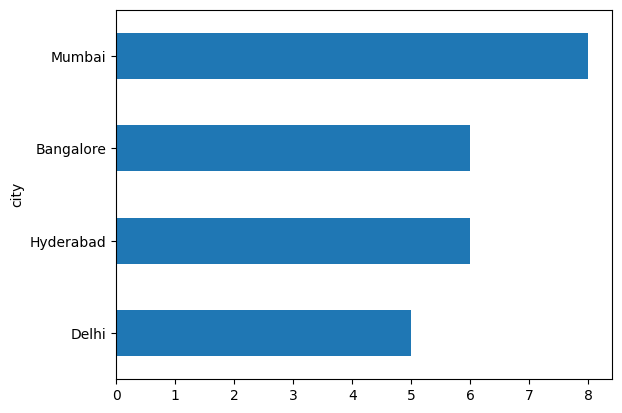

In [147]:
df_hotel['city'].value_counts().sort_values().plot(kind='barh')

plt.show()

***
**Explore aggregate bookings**
***

In [148]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


**Find out unique property ids in aggregate bookings dataset**

In [149]:
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Find out total bookings per property_id**

In [151]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum().sort_values(ascending=False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

**Find out days on which bookings are greater than capacity**

In [152]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Find out properties that have highest capacity**

In [153]:
df_agg_bookings['capacity'].max()

np.float64(50.0)

In [154]:
df_agg_bookings[df_agg_bookings['capacity'] == df_agg_bookings['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [22]:
df_booking.describe() # Lookup for abnormal data

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [23]:
df_booking.shape

(134590, 12)

**1) Clean invalid guests**

In [24]:
df_booking[df_booking['no_guests'] < 0] # Check row that no_guest less than 0 
# Because guess can't less than zero

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
df_booking = df_booking[df_booking['no_guests']>=0] # Remove guess less than zero
df_booking.shape

(134578, 12)

In [26]:
print(df_booking['revenue_generated'].min(),df_booking['revenue_generated'].max())
# Check anormal value in revenue_genereated

6500 28560000


**2) Outlier removal in revenue generated**

In [27]:
avg,std = df_booking['revenue_generated'].mean(), df_booking['revenue_generated'].std()
print(avg,std) # Find mean and std for calculate limit

15378.036937686695 93040.1549314641


In [28]:
highest_limit = avg + 3*std
highest_limit # Highest bound

np.float64(294498.50173207896)

In [29]:
lowest_limit = avg - 3*std
lowest_limit # Lowest bound

np.float64(-263742.4278567056)

In [30]:
df_booking.shape

(134578, 12)

In [31]:
df_booking[df_booking['revenue_generated'] > highest_limit]
# Check which value is outlier

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [32]:
df_booking = df_booking[df_booking['revenue_generated'] < highest_limit]
df_booking.shape

(134573, 12)

In [33]:
df_booking['revenue_generated'].describe() 

count    134573.000000
mean      14915.959776
std        6452.676164
min        6500.000000
25%        9900.000000
50%       13500.000000
75%       18000.000000
max       45220.000000
Name: revenue_generated, dtype: float64

In [34]:
highest_limit = df_booking['revenue_generated'].mean() + 3*df_booking['revenue_generated'].std()
highest_limit

np.float64(34273.98826948176)

In [35]:
df_booking[df_booking['revenue_generated'] > highest_limit] # Check outlier again

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
153,May012216559RT417,16559,30-04-22,1/5/2022,2/5/2022,4.0,RT4,others,NaN,Cancelled,38760,15504
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134469,Jul312219562RT47,19562,10/7/2022,31-07-22,6/8/2022,5.0,RT4,makeyourtrip,NaN,Cancelled,37050,14820
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [36]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [37]:
avg = df_booking[df_booking['room_category'] == 'RT4'].revenue_generated.mean()
std = df_booking[df_booking['room_category'] == 'RT4'].revenue_generated.std()
avg,std # Find avg,std for Presidential room class

(np.float64(27465.457034409807), np.float64(6310.403418299441))

In [38]:
highest_limit = avg + 3*std
highest_limit # Hihgest limit of Presidential room class

np.float64(46396.66728930813)

In [39]:
df_booking[df_booking['room_category'] == 'RT4'].revenue_generated.describe()
# Don't necessary to remove because max in Presidential room class is less than highest_limit

count    16071.000000
mean     27465.457034
std       6310.403418
min      19000.000000
25%      19000.000000
50%      28500.000000
75%      32300.000000
max      45220.000000
Name: revenue_generated, dtype: float64

**In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [40]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [41]:
df_agg_bookings[df_agg_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [42]:
df_agg_bookings = df_agg_bookings.fillna({
	'capacity': df_agg_bookings['capacity'].median()
})
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


***
### ==> 3. Data Transformation
***

In [43]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [44]:
df_agg_bookings['occ-pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [45]:
df_agg_bookings['occ-pct'] = df_agg_bookings['occ-pct'].apply(lambda x: round((x*100),2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1.What is an average occupancy rate in each of the room categories?**

In [46]:
df_agg_bookings.groupby('room_category')['occ-pct'].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ-pct, dtype: float64

In [47]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [48]:
df_oc_rc = pd.merge(df_agg_bookings, df_room, left_on='room_category', right_on='room_id')
df_oc_rc.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard


In [49]:
df_oc_rc.groupby('room_class')['occ-pct'].sum()

room_class
Elite           133492.64
Premium         133464.89
Presidential    136391.06
Standard        133935.32
Name: occ-pct, dtype: float64

In [50]:
df_oc_rc.drop(labels='room_id',axis=1, inplace=True)

In [51]:
df_oc_rc.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


**2.Print average occupancy per city**

In [52]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [53]:
df_hotel['city'].unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [54]:
df_oc_rc = pd.merge(df_agg_bookings, df_hotel, on='property_id')
df_oc_rc.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi


In [55]:
df_oc_rc.groupby('city')['occ-pct'].mean().round(2)

city
Bangalore    56.59
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Name: occ-pct, dtype: float64

**3.When was the occupancy better? Weekday or Weekend?**

In [56]:
df_oc_rc.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi


In [57]:
df_oc_rc['check_in_date'] = pd.to_datetime(df_oc_rc['check_in_date'],format='%d-%b-%y')

In [58]:
df_date = pd.read_csv('datasets/dim_date.csv')

In [59]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [60]:
df_date['date'] = pd.to_datetime(df_date['date'],format='%d-%b-%y')


In [61]:
df_oc_rc = pd.merge(df_oc_rc, df_date, left_on='check_in_date', right_on='date')
df_oc_rc.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,17558,2022-05-01,RT1,30,19.0,157.89,Atliq Grands,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,16558,2022-05-01,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [62]:
df_oc_rc.groupby('day_type')['occ-pct'].mean().round(2)

day_type
weekeday    51.82
weekend     74.24
Name: occ-pct, dtype: float64

**4.In the month of June, what is the occupancy for different cities**

In [63]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [64]:
df_oc_rc.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,19562,2022-05-01,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend
2,19563,2022-05-01,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore,2022-05-01,May 22,W 19,weekend
3,17558,2022-05-01,RT1,30,19.0,157.89,Atliq Grands,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend


In [65]:
# Create date
june_date = df_oc_rc[df_oc_rc['mmm yy'] == 'Jun 22']
june_date.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,2022-06-01,RT1,14,30.0,46.67,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3101,18560,2022-06-01,RT1,18,30.0,60.00,Atliq City,Business,Hyderabad,2022-06-01,Jun 22,W 23,weekeday
3102,19562,2022-06-01,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,2022-06-01,Jun 22,W 23,weekeday
3103,19563,2022-06-01,RT1,14,30.0,46.67,Atliq Palace,Business,Bangalore,2022-06-01,Jun 22,W 23,weekeday
3104,17558,2022-06-01,RT1,8,19.0,42.11,Atliq Grands,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday


In [66]:
june_date.groupby('city')['occ-pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ-pct, dtype: float64

In [67]:
df_aug = pd.read_csv('datasets/new_data_august.csv')
df_aug.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [68]:
df_oc_rc.shape,df_aug.shape

((9200, 13), (7, 13))

In [69]:
df_a_aug = pd.concat([df_oc_rc, df_aug], ignore_index=True)
df_a_aug.tail(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ-pct,property_name,category,city,date,mmm yy,week no,day_type,room_class,occ%
9202,19563,01-Aug-22,RT1,23,30.0,NaN,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,Standard,76.67
9203,19558,01-Aug-22,RT1,30,40.0,NaN,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,Standard,75.00
9204,19560,01-Aug-22,RT1,20,26.0,NaN,Atliq City,Business,Bangalore,NaT,Aug-22,W 32,weekeday,Standard,76.92
9205,17561,01-Aug-22,RT1,18,26.0,NaN,Atliq Blu,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,Standard,69.23
9206,17564,01-Aug-22,RT1,10,16.0,NaN,Atliq Seasons,Business,Mumbai,NaT,Aug-22,W 32,weekeday,Standard,62.50


In [70]:
df_a_aug.shape

(9207, 15)

**6. Print revenue realized per city**

In [71]:
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [72]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [89]:
df_rev_city = pd.merge(df_booking, df_hotel, on='property_id')
df_rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [90]:
df_rev_city.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [91]:
import re
from datetime import datetime

# Create function to convert in various datetime
def convert_mixed_dates(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    # Convert string to other data
    date_str = str(date_str).strip()
    
    # Pattern 1: d/m/yyyy such as 1/5/2022
    if re.match(r'^\d{1,2}/\d{1,2}/\d{4}$', date_str):
        try:
            return pd.to_datetime(date_str, format='%d/%m/%Y')
        except:
            pass
    
    # Pattern 2: dd-mm-yy such as 16-05-22
    elif re.match(r'^\d{1,2}-\d{1,2}-\d{2}$', date_str):
        try:
            return pd.to_datetime(date_str, format='%d-%m-%y')
        except:
            pass

    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT  # Not a Time


In [92]:
df_rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [93]:
df_rev_city['check_in_date'] = df_rev_city['check_in_date'].apply(convert_mixed_dates)

In [94]:
df_rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [95]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [96]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [97]:
df_rev_city = pd.merge(df_rev_city, df_date, left_on='check_in_date', right_on='date')
df_rev_city.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [98]:
df_rev_city.groupby('mmm yy')['revenue_realized'].sum().sort_values(ascending=False)

mmm yy
May 22    581767396
Jul 22    572843348
Jun 22    553925855
Name: revenue_realized, dtype: int64

**8. Print revenue realized per hotel type**

In [99]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [101]:
df_rev_city.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [84]:
df_hotel['property_name'].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [105]:
df_rev_city.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Exotica    320258588
Atliq Grands     211462134
Atliq Palace     304081863
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [106]:
df_rev_city.groupby('category')['revenue_realized'].sum()

category
Business     655967037
Luxury      1052569562
Name: revenue_realized, dtype: int64

**9. Print average rating per city**

In [108]:
df_rev_city.groupby('city')['ratings_given'].mean().round(2).sort_values(ascending=True)

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

**10. Print a pie chart of revenue realized per booking platform**

In [112]:
df_rev_city.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [113]:
df_rev_city['booking_platform'].unique()

array(['others', 'direct online', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [116]:
total_rev_plat = df_rev_city.groupby('booking_platform')['revenue_realized'].sum()
total_rev_plat

booking_platform
direct offline     86374933
direct online     168948637
journey           102531334
logtrip           187494028
makeyourtrip      340814104
others            699306762
tripster          123066801
Name: revenue_realized, dtype: int64

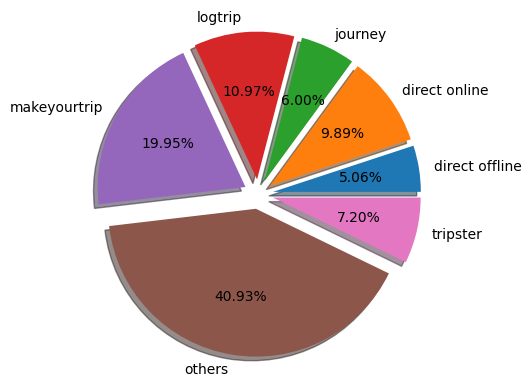

In [126]:
plt.pie(total_rev_plat, labels=total_rev_plat.index, autopct='%1.2f%%',
			explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1], shadow=True)

plt.show()